In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

from sklearn.decomposition import PCA

## Обработка данных

**1. Предварительная обработка данных**

In [ ]:
column_names = [
   "Местное время в Самаре", "T", "Po", "P", "Pa", "U", "DD",
"Ff", "ff10", "ff3",
   "N", "WW", "W1", "W2", "Tn", "Tx", "Cl", "Nh", "H", "Cm", "Ch",
"VV", "Td", "RRR", "tR",
   "E", "Tg", "E'", "sss"
]
# Чтение Excel файла
data = pd.read_excel(
"samara.xls",  # Путь к файлу
skiprows=6,  # Пропустить первые 6 строк
names=column_names)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Местное время в Самаре  1480 non-null   object 
 1   T                       1479 non-null   float64
 2   Po                      1480 non-null   float64
 3   P                       1480 non-null   float64
 4   Pa                      1477 non-null   float64
 5   U                       1479 non-null   float64
 6   DD                      1480 non-null   object 
 7   Ff                      1480 non-null   int64  
 8   ff10                    12 non-null     float64
 9   ff3                     89 non-null     float64
 10  N                       1478 non-null   object 
 11  WW                      1480 non-null   object 
 12  W1                      302 non-null    object 
 13  W2                      302 non-null    object 
 14  Tn                      210 non-null    

In [ ]:
data = data.loc[:, data.isnull().mean() < 0.5]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Местное время в Самаре  1480 non-null   object 
 1   T                       1479 non-null   float64
 2   Po                      1480 non-null   float64
 3   P                       1480 non-null   float64
 4   Pa                      1477 non-null   float64
 5   U                       1479 non-null   float64
 6   DD                      1480 non-null   object 
 7   Ff                      1480 non-null   int64  
 8   N                       1478 non-null   object 
 9   WW                      1480 non-null   object 
 10  Cl                      1195 non-null   object 
 11  Nh                      1195 non-null   object 
 12  H                       1198 non-null   object 
 13  Cm                      1110 non-null   object 
 14  Ch                      885 non-null    

In [ ]:
# Заменяем нечисловые данные на числовые
def encode_column(column):
    if column != "Местное время в Самаре":
        if data[column].dtype == 'object':
            unique_values = data[column].dropna().unique()
            mapping = {value: idx for idx, value in enumerate(unique_values)}
            data[column] = data[column].map(mapping)
            return mapping
        return None

encodings = {}
for col in data.columns:
    encoding = encode_column(col)
    if encoding:
        encodings[col] = encoding

<ipython-input-49-b726845d11fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].map(mapping)
<ipython-input-49-b726845d11fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].map(mapping)
<ipython-input-49-b726845d11fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [ ]:
data

,Местное время в Самаре,T,Po,P,Pa,U,DD,Ff,N,WW,Cl,Nh,H,Cm,Ch,VV,Td
0,08.11.2023 22:00,7.6,747.1,759.7,0.6,94.0,0,2,0.0,0,0.0,0.0,0.0,0.0,0.0,10.0,6.7
1,08.11.2023 19:00,8.4,746.5,758.9,0.8,86.0,1,2,1.0,1,0.0,1.0,0.0,1.0,0.0,10.0,6.1
2,08.11.2023 16:00,8.9,745.7,758.2,1.3,77.0,1,2,2.0,1,0.0,2.0,0.0,1.0,NaN,10.0,5.1
3,08.11.2023 13:00,8.9,744.4,756.7,1.0,81.0,2,2,2.0,1,0.0,3.0,0.0,NaN,NaN,10.0,5.8
4,08.11.2023 10:00,7.3,743.4,755.8,1.0,96.0,0,2,2.0,1,0.0,3.0,1.0,NaN,NaN,10.0,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,08.05.2023 13:00,10.1,757.4,770.0,-1.1,33.0,11,2,9.0,1,8.0,5.0,0.0,0.0,0.0,10.0,-5.4
1476,08.05.2023 10:00,7.5,758.5,771.3,0.0,37.0,10,3,4.0,1,0.0,6.0,0.0,1.0,0.0,10.0,-6.3
1477,08.05.2023 07:00,4.4,758.5,771.4,0.8,52.0,2,1,4.0,1,4.0,4.0,2.0,0.0,1.0,10.0,-4.8
1478,08.05.2023 04:00,3.1,757.7,770.6,0.8,54.0,2,1,7.0,1,NaN,NaN,NaN,NaN,NaN,10.0,-5.3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Местное время в Самаре  1480 non-null   object 
 1   T                       1479 non-null   float64
 2   Po                      1480 non-null   float64
 3   P                       1480 non-null   float64
 4   Pa                      1477 non-null   float64
 5   U                       1479 non-null   float64
 6   DD                      1480 non-null   int64  
 7   Ff                      1480 non-null   int64  
 8   N                       1478 non-null   float64
 9   WW                      1480 non-null   int64  
 10  Cl                      1195 non-null   float64
 11  Nh                      1195 non-null   float64
 12  H                       1198 non-null   float64
 13  Cm                      1110 non-null   float64
 14  Ch                      885 non-null    

In [ ]:
# Удаление колонок с нулевой дисперсией
zero_var_cols = [col for col in data.columns if data[col].nunique() <= 1]
data = data.drop(columns=zero_var_cols)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Местное время в Самаре  1480 non-null   object 
 1   T                       1479 non-null   float64
 2   Po                      1480 non-null   float64
 3   P                       1480 non-null   float64
 4   Pa                      1477 non-null   float64
 5   U                       1479 non-null   float64
 6   DD                      1480 non-null   int64  
 7   Ff                      1480 non-null   int64  
 8   N                       1478 non-null   float64
 9   WW                      1480 non-null   int64  
 10  Cl                      1195 non-null   float64
 11  Nh                      1195 non-null   float64
 12  H                       1198 non-null   float64
 13  Cm                      1110 non-null   float64
 14  Ch                      885 non-null    

In [ ]:
# Выделяем один отчет в сутки (например, оставляем только первую запись каждого дня)
data['Дата'] = pd.to_datetime(data['Местное время в Самаре'], format = "%d.%m.%Y %H:%M").dt.date
data_daily = data.groupby('Дата').first().reset_index()

In [ ]:
data_daily = data_daily.drop(columns=['Местное время в Самаре'])

In [ ]:
data_daily

,Дата,T,Po,P,Pa,U,DD,Ff,N,WW,Cl,Nh,H,Cm,Ch,VV,Td
0,2023-05-08,6.9,758.5,771.2,1.2,44.0,8,2,7.0,1,4.0,4.0,2.0,0.0,1.0,10.0,-4.5
1,2023-05-09,11.1,755.3,767.8,-0.3,30.0,9,1,2.0,1,4.0,4.0,2.0,0.0,3.0,10.0,-6.1
2,2023-05-10,14.4,751.3,763.6,0.5,23.0,9,1,2.0,1,0.0,6.0,3.0,1.0,1.0,10.0,-6.3
3,2023-05-11,14.8,750.1,762.4,0.2,40.0,7,0,2.0,1,0.0,0.0,0.0,1.0,1.0,10.0,1.1
4,2023-05-12,10.3,747.0,759.4,0.7,67.0,9,1,2.0,0,7.0,7.0,0.0,1.0,1.0,10.0,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2023-11-04,1.9,757.2,770.2,0.5,77.0,4,1,7.0,1,4.0,4.0,2.0,0.0,1.0,10.0,-1.8
181,2023-11-05,4.7,753.9,766.6,-0.6,93.0,4,3,7.0,1,4.0,4.0,2.0,0.0,1.0,10.0,3.7
182,2023-11-06,7.0,747.4,760.0,-1.1,88.0,4,3,6.0,1,4.0,6.0,2.0,1.0,1.0,10.0,5.1
183,2023-11-07,5.8,741.6,754.1,-0.4,97.0,1,1,2.0,3,2.0,3.0,1.0,1.0,1.0,10.0,5.4


In [ ]:
data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Дата    185 non-null    object 
 1   T       185 non-null    float64
 2   Po      185 non-null    float64
 3   P       185 non-null    float64
 4   Pa      185 non-null    float64
 5   U       185 non-null    float64
 6   DD      185 non-null    int64  
 7   Ff      185 non-null    int64  
 8   N       185 non-null    float64
 9   WW      185 non-null    int64  
 10  Cl      182 non-null    float64
 11  Nh      182 non-null    float64
 12  H       182 non-null    float64
 13  Cm      182 non-null    float64
 14  Ch      177 non-null    float64
 15  VV      185 non-null    float64
 16  Td      185 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 24.7+ KB


In [ ]:
selected_columns = ['T', 'Po', 'P', 'U', 'DD', 'Ff', 'N', 'Nh', 'H', 'VV',]
data_selected = data_daily[selected_columns]
data_selected

,T,Po,P,U,DD,Ff,N,Nh,H,VV
0,6.9,758.5,771.2,44.0,8,2,7.0,4.0,2.0,10.0
1,11.1,755.3,767.8,30.0,9,1,2.0,4.0,2.0,10.0
2,14.4,751.3,763.6,23.0,9,1,2.0,6.0,3.0,10.0
3,14.8,750.1,762.4,40.0,7,0,2.0,0.0,0.0,10.0
4,10.3,747.0,759.4,67.0,9,1,2.0,7.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...
180,1.9,757.2,770.2,77.0,4,1,7.0,4.0,2.0,10.0
181,4.7,753.9,766.6,93.0,4,3,7.0,4.0,2.0,10.0
182,7.0,747.4,760.0,88.0,4,3,6.0,6.0,2.0,10.0
183,5.8,741.6,754.1,97.0,1,1,2.0,3.0,1.0,10.0


## Построение графиков

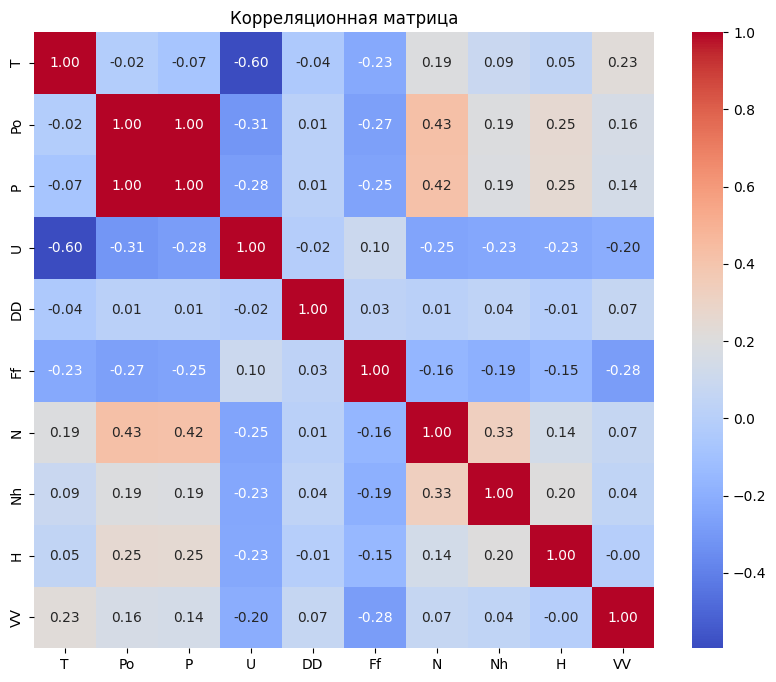

In [ ]:
# Построение корреляционной матрицы
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
# Интерпретация корреляций
print("Корреляционная матрица показывает, какие параметры связаны друг с другом. Например:")
for i, col in enumerate(corr_matrix.columns):
    for j, row in enumerate(corr_matrix.index):
        if i < j and abs(corr_matrix.loc[row, col]) > 0.5:
            print(f"Пара {row} и {col} имеет сильную корреляцию: {corr_matrix.loc[row, col]:.2f}")

Корреляционная матрица показывает, какие параметры связаны друг с другом. Например:
Пара U и T имеет сильную корреляцию: -0.60
Пара P и Po имеет сильную корреляцию: 1.00


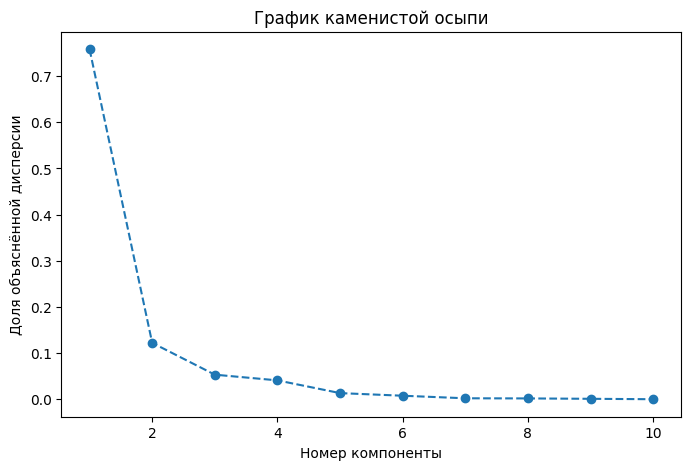

In [ ]:
# Построение графика каменистой осыпи
from sklearn.decomposition import PCA

pca = PCA()
data_pca = pca.fit_transform(data_selected.dropna())  # Применяем PCA к данным
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('График каменистой осыпи')
plt.xlabel('Номер компоненты')
plt.ylabel('Доля объяснённой дисперсии')
plt.show()

# PSA

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Нормализуем данные перед PCA
from sklearn.preprocessing import StandardScaler

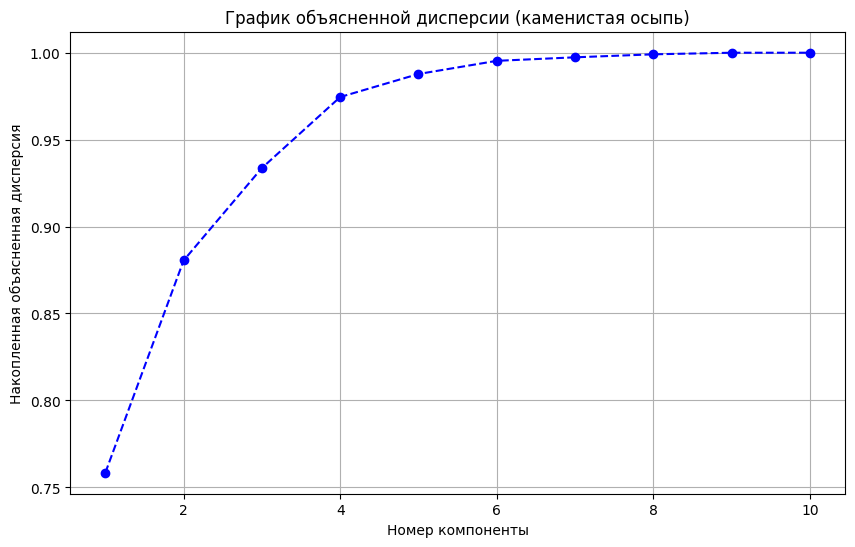

In [ ]:
# График объясненной дисперсии (график "каменистой осыпи")
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--', color='b')
plt.xlabel('Номер компоненты')
plt.ylabel('Накопленная объясненная дисперсия')
plt.title('График объясненной дисперсии (каменистая осыпь)')
plt.grid()
plt.show()

In [ ]:
print("Объяснённая дисперсия для каждой компоненты:")
for i, var_ratio in enumerate(explained_variance):
   print(f"Компонента {i+1}: {var_ratio:.4f}")

Объяснённая дисперсия для каждой компоненты:
Компонента 1: 0.7583
Компонента 2: 0.1221
Компонента 3: 0.0532
Компонента 4: 0.0408
Компонента 5: 0.0132
Компонента 6: 0.0076
Компонента 7: 0.0020
Компонента 8: 0.0017
Компонента 9: 0.0009
Компонента 10: 0.0000


In [ ]:
# Вычислить процент объяснённой дисперсии для первых n компонент
n = 4  # Например, 4 компоненты
explained_variance_n = sum(explained_variance[:n]) * 100
print(f"Процент объяснённой дисперсии для первых {n} компонент: {explained_variance_n:.2f}%")

Процент объяснённой дисперсии для первых 4 компонент: 97.45%


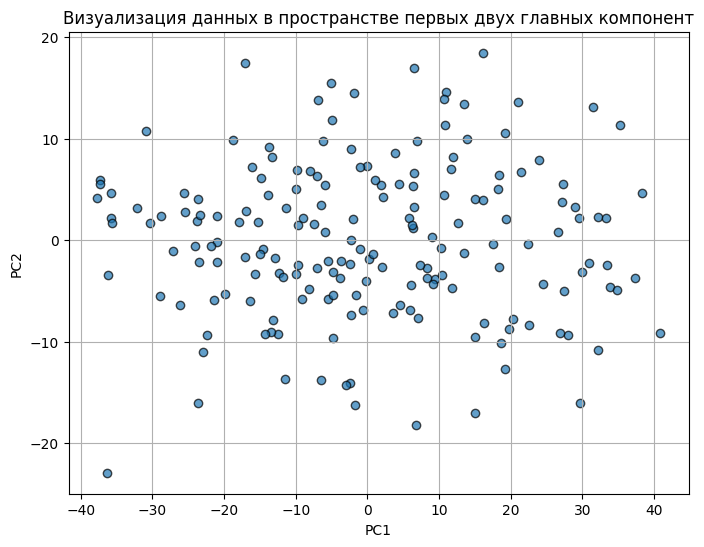

In [ ]:
# Построить проекцию данных на новое пространство
# Создаём DataFrame для новых данных
data_projected = pd.DataFrame(data_pca[:, :n], columns=[f"PC{i+1}" for i in range(n)])

# Визуализируем проекцию в пространстве двух главных компонент
plt.figure(figsize=(8, 6))
plt.scatter(data_projected["PC1"], data_projected["PC2"], alpha=0.7, edgecolor='k')
plt.title('Визуализация данных в пространстве первых двух главных компонент')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

# t-SNE

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Нормализация данных для работы t-SNE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_selected.dropna())

In [ ]:
# Применяем t-SNE с базовыми параметрами
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(data_normalized)

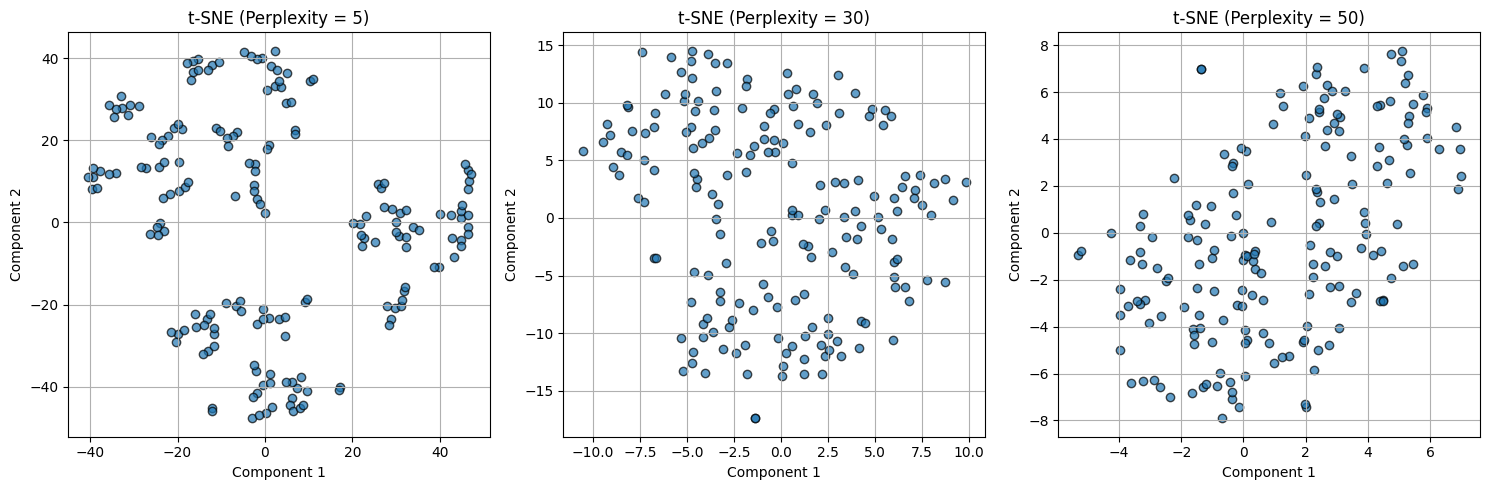

In [ ]:
# 3b. Применить t-SNE с разными значениями перплексии
perplexities = [5, 30, 50]
tsne_results = {}

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results[perplexity] = tsne.fit_transform(data_normalized)

# 3c. Визуализировать результаты
plt.figure(figsize=(15, 5))
for i, perplexity in enumerate(perplexities, 1):
    plt.subplot(1, len(perplexities), i)
    tsne_data = tsne_results[perplexity]
    plt.scatter(tsne_data[:, 0], tsne_data[:, 1], alpha=0.7, edgecolor='k')
    plt.title(f"t-SNE (Perplexity = {perplexity})")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid()

plt.tight_layout()
plt.show()